In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft
from ipywidgets import IntSlider, interactive, VBox, HBox

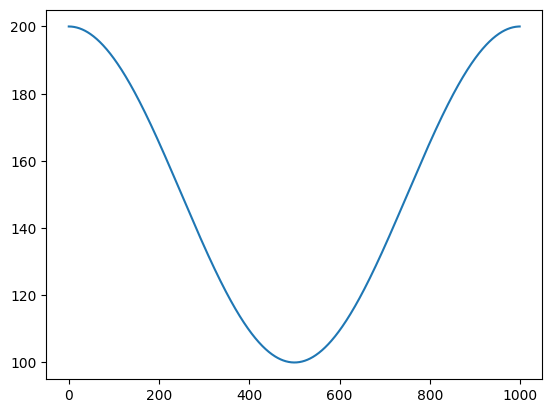

In [28]:
N=1000
t = np.arange(0,1,1/N)

def w(t):
    res = 150 + 50*np.cos(2*math.pi*t)
    return res

plt.plot( w(t) )

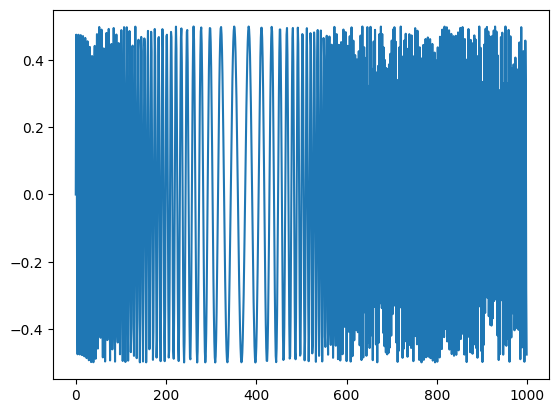

In [29]:
def terceiro_termo(t):
    res = 0.5 * np.sin(2*math.pi*w(t)*t)
    return res

plt.plot(terceiro_termo(t))

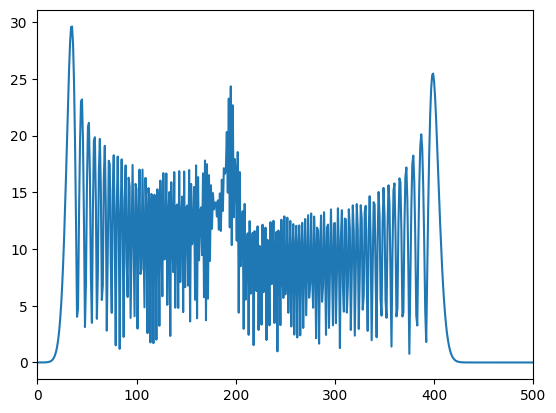

In [73]:
f = terceiro_termo(t)
plt.plot(range(N//2),abs(fft(f)[1:N//2+1]))
plt.xlim([0, N/2]);

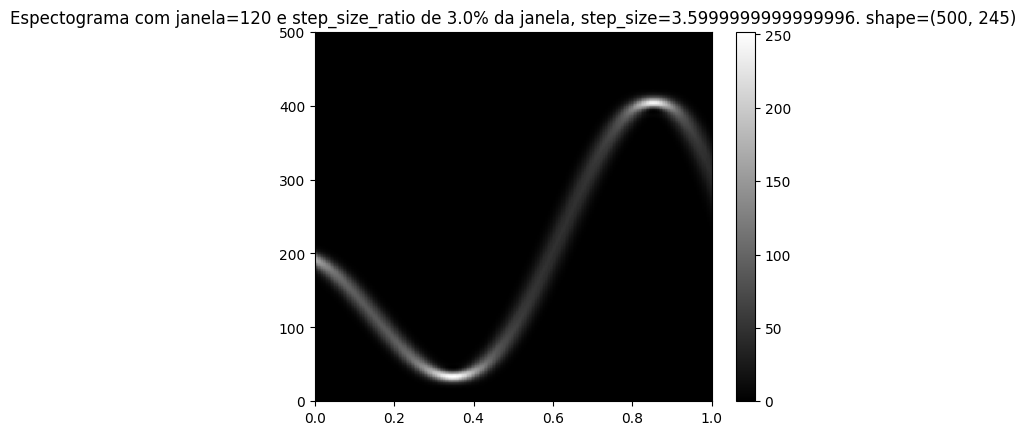

In [60]:
def build_window2(N, start, end, type='retangular'):
    w = np.zeros(N);
    width = end - start
    if type == 'retangular':
        w[start:end] = 1
        
    if type == 'triangular':
        w[start:end] = np.bartlett(width)
    
    if type == 'gausiana':
        sigma = 10
        w[start:end] = signal.gaussian(width, sigma)
        
    if type == 'hamming':
        w[start:end] = np.hamming(width)
        
    return w

# espectograma janelado x*h e não recortado. A ideia é manter a resolução máxima (N//2 Hz)
def plot_spectogram2(x, window_width=50, step_size_ratio=0.6, log_normalized=False, exp_normalized=False, tipo_janela='retangular', exp_coeficient=2, color=False, returnImage=False):
    N = len(x)
    nr_rows = N // 2
    step_size = step_size_ratio * window_width
    
    nr_cols =  math.floor((N - window_width) / step_size) + 1
    spectogram = np.zeros((nr_rows, nr_cols))
    
    for col in range(nr_cols):
        inicio = int(col * step_size)
        fim = inicio + window_width
        janela = build_window2(N, inicio, fim, type=tipo_janela)
        x_janelado = x * janela
        magnitude = abs(fft(x_janelado))
        if log_normalized:
            magnitude = np.log(1+magnitude)
        elif exp_normalized:
            magnitude = (magnitude)**exp_coeficient
        spectogram[0:nr_rows, col] = np.flip(magnitude[0:nr_rows])
    
    plt.title(f'Espectograma com janela={window_width} e step_size_ratio de {step_size_ratio*100}% da janela, step_size={step_size}. shape={spectogram.shape}')
    if color:
        plt.imshow(spectogram, aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])
    else: 
        plt.imshow(spectogram, cmap='gray', aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])
#     plt.imshow(spectogram, aspect='auto', interpolation='none', extent=[0, 1, 0, N//2])
    plt.colorbar()
    if returnImage:
        return spectogram
plot_spectogram2(f, window_width=120, step_size_ratio=0.03, exp_normalized=True ,tipo_janela='hamming')



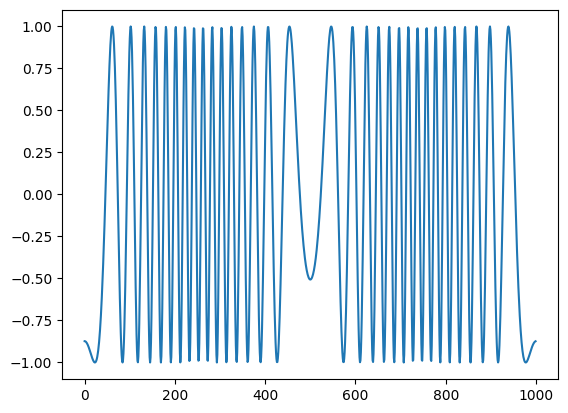

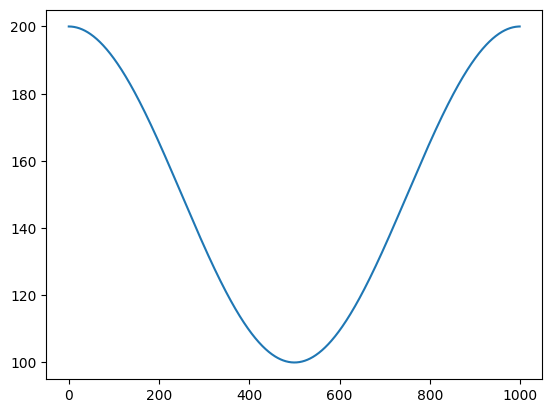

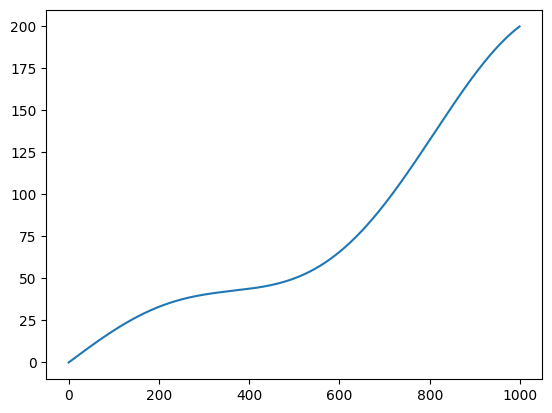

In [85]:
def f(w, t): return np.sin(w(t))


plt.plot(f(w,t))
plt.figure()
plt.plot(w(t))
plt.figure()
plt.plot(w(t)*t)

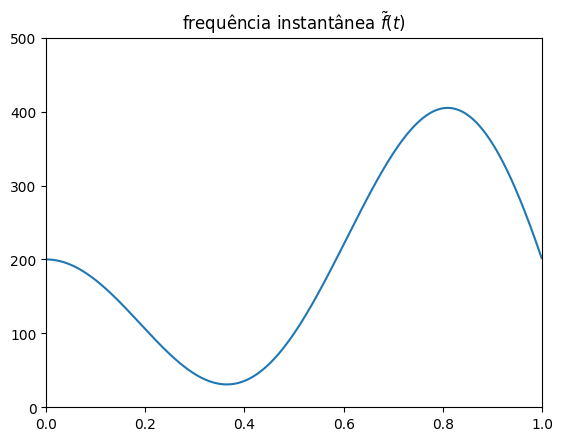

In [90]:
# omega = 150 + 50 * np.cos(2*math.pi * t)
omega = w(t)
omegatil = omega - 100*math.pi*np.sin(2*math.pi * t)*t
plt.plot(t,omegatil);
plt.axis([0, 1, 0, 500]);
plt.title(r"frequência instantânea $\tilde{f}(t)$");
plt.show()

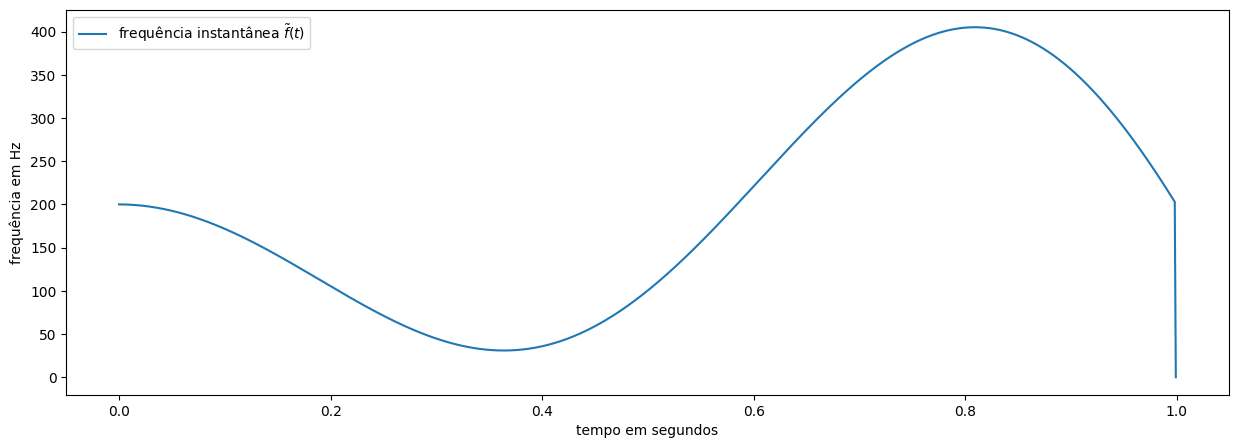

31.060314095433366

In [118]:
omegatil = np.zeros(len(omega))

for i in range(len(omega)-1):
    t1 = t[i]
    t2 = t[i+1]
    ft1 = omega[i]
    ft2 = omega[i+1]
    omegatil[i] = ((2 * math.pi * ft2 * t2) - (2 * math.pi * ft1 * t1)) / (t2 - t1)

# convertendo para Hz
ftil = omegatil / (2*math.pi)

plt.figure(figsize=(15,5));
#     plt.plot(t,f, label=r'f(t)')

plt.plot(t,ftil, label=r"frequência instantânea $\tilde{f}(t)$");
plt.xlabel('tempo em segundos')
plt.ylabel('frequência em Hz')
#     plt.axis([0, 10, 0, 2500]);
plt.legend()
plt.show()

ftil[370]

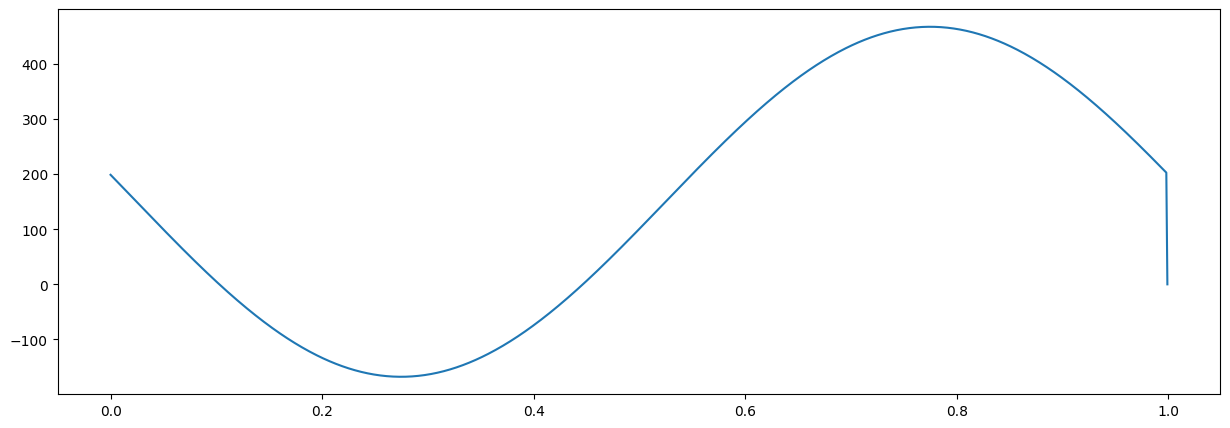

In [105]:
omegatil = np.zeros(len(omega))

for i in range(len(omega)-1):
    t1 = t[i]
    t2 = t[i+1]
    ft1 = omega[i]
    ft2 = omega[i+1]
#     omegatil[i] = ((ft2 * t2) - (ft1 * t1)) / (t2 - t1)
    omegatil[i] = omega[i] + (ft2 - ft1) / (t2 - t1)
    
plt.figure(figsize=(15,5));
#     plt.plot(t,f, label=r'f(t)')

plt.plot(t,omegatil, label=r"frequência instantânea $\tilde{f}(t)$");

In [110]:
omegatil[250]

-164.15719827793936

Essa aproximação é semelhante 
Aparentemente essa aproximação